<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Generador congruencial:**

Objetivo: Producir un generador congruencial lineal multiplicativo, el cual produce una sucesión de números enteros mediante una relación de recurrencia modular, la cual depende de una semilla inicial.

La sucesión se genera utilizando la expresión:
$$
x_{n+1} = (a*x_n)\text{mod }m \\
x_0 = \text{semilla inicial} \\
a = \text{multiplicador} \\
m = \text{modulo}
$$

En este caso:
$$
a = 3355703948966806693
$$
Posteriormente normalizamos:
$$
u_n = \frac{x_n}{m}
$$

In [8]:
import random as rd
import numpy as np

In [9]:
def lcg(n, seed):
  x = seed # semilla = el primer valor de la sucesión
  lista = []
  a = 3355703948966806693
  m = 2**64 - 2**10 + 1
  for i in range(n):
    x = (a * x) % m
    lista.append(x / m)

  return lista

In [10]:
datos_lcg = lcg(1000, 123456)   # 1000 para la prueba
datos_python = np.random.uniform(0,1,1000)

Generar 10 números entre 0 y 1 usando numpy.

In [13]:
datos_py = np.random.uniform(0, 1, 10)
print(datos_py)

[0.56556299 0.89261886 0.03465856 0.15032886 0.40710637 0.06500393
 0.35646074 0.25417766 0.71357338 0.04323716]


# Media y Varianza

Para una distribución unidorme en (0,1) se sabe que:
$$
E(X) = 0.5, \quad \text{Var}(X) = \frac{1}{12} ≈ 0.08333
$$
Por ello se calculan la media y varianza muestral de los datos generados.
Si el generador es adecuado, estos valores deben aproximarse a los teóricos.

In [19]:
# Media y varianza del LCG
print("LCG media:", np.mean(datos_lcg))
print("LCG varianza:", np.var(datos_lcg))

# Media y varianza de Python
print("Python media:", np.mean(datos_python))
print("Python varianza:", np.var(datos_python))

LCG media: 0.5040626087797248
LCG varianza: 0.08289798555288473
Python media: 0.4900382442907522
Python varianza: 0.08169871667448363


Es decir, el generador LCG presentó desviaciones, indicando baja calidad aleatoria, mientras que el generador de Python produjo valores más cercanos a la teoría, mostrando mejor comportamiento estadístico.

In [16]:
import math

def chi_cuadrada(datos, k=10):

    n = len(datos)
    esperado = n / k

    # crear contenedores
    frecuencias = [0]*k

    # contar en qué intervalo cae cada numero
    for x in datos:
        indice = min(int(x*k), k-1)
        frecuencias[indice] += 1

    # calcular chi cuadrada
    chi = 0
    for fo in frecuencias:
        chi += (fo - esperado)**2 / esperado

    return chi, frecuencias

In [20]:
chi_lcg, frec_lcg = chi_cuadrada(datos_lcg)
chi_py, frec_py = chi_cuadrada(datos_python)

print("Chi LCG:", chi_lcg)
print("Chi Python:", chi_py)

Chi LCG: 6.06
Chi Python: 7.680000000000001


El generador LCG produce valores compatibles con una distribución uniforme bajo la prueba χ² para α = 0.05, mientras que el generador de Python en esta ejecución particular no superó la prueba.

In [21]:
def ks_test(datos):
    datos = np.sort(datos)
    n = len(datos)

    D_plus = max((i+1)/n - datos[i] for i in range(n))
    D_minus = max(datos[i] - i/n for i in range(n))

    D = max(D_plus, D_minus)
    return D

In [22]:
D_lcg = ks_test(datos_lcg)
D_py = ks_test(datos_python)

print("KS LCG:", D_lcg)
print("KS Python:", D_py)

KS LCG: 0.01949030145414743
KS Python: 0.02245604227015141


In [24]:
n = len(datos_lcg)
D_crit = 1.36/math.sqrt(n)

print("D crítico:", D_crit)

D crítico: 0.04300697617828996


Donde:
Si D < Dcrit → uniforme
Si D > Dcrit → no uniforme

#Observaciones:

Se aplicó la prueba de Kolmogorov-Smirnov para verificar la uniformidad de los números generados.
Para un nivel de significancia de 5% se obtuvo un valor crítico.
$$
D_{\text{crit}}= 0.0430
$$
El generador congruencial lineal (LCG) produjo $D = 0.01949 < D_{\text{crit}}$, por lo que no se rechaza la hipótesis de uniformidad.
El generador de Python produjo $D = 0.04830 > D_{\text{crit}}$, por lo que se rechaza la hipótesis de uniformidad para esta muestra.

Por lo tanto, para este experimento el generador LCG resultó mejor que el generador uniforme de Python.

# Repetir para diferentes tamaños de n

In [25]:
tamanos = [10, 100, 1000, 10000, 100000]

In [31]:
for n in tamanos:

    datos_lcg = lcg(n, 123456)
    datos_python = np.random.uniform(0,1,n)

    chi_lcg, _ = chi_cuadrada(datos_lcg)
    chi_py, _ = chi_cuadrada(datos_python)

    print("n =", n)
    print("Chi LCG:", chi_lcg)
    print("Chi Python:", chi_py)

    print("LCG media:", np.mean(datos_lcg))
    print("LCG var:", np.var(datos_lcg))

    print("Python media:", np.mean(datos_python))
    print("Python var:", np.var(datos_python))
    print("-----------------------------")

n = 10
Chi LCG: 12.0
Chi Python: 10.0
LCG media: 0.4221264940007117
LCG var: 0.11460011199342297
Python media: 0.6464773633759074
Python var: 0.10315292906027926
-----------------------------
n = 100
Chi LCG: 8.6
Chi Python: 9.8
LCG media: 0.4650962642281199
LCG var: 0.08955302040897252
Python media: 0.5405872641711789
Python var: 0.09674490266728532
-----------------------------
n = 1000
Chi LCG: 6.06
Chi Python: 12.66
LCG media: 0.5040626087797248
LCG var: 0.08289798555288473
Python media: 0.48538742835713466
Python var: 0.08270078251275068
-----------------------------
n = 10000
Chi LCG: 8.072000000000001
Chi Python: 9.012
LCG media: 0.5021038873780707
LCG var: 0.08301634384173939
Python media: 0.5024756144486575
Python var: 0.08358664057787324
-----------------------------
n = 100000
Chi LCG: 18.561999999999998
Chi Python: 8.0564
LCG media: 0.49990993087393953
LCG var: 0.08351766411253632
Python media: 0.5007864782337246
Python var: 0.08307915441624655
-----------------------------

# Observaciones:

Para muestras grandes (n=10^5) numpy > LCG; para n pequeños/medios ambos se comportan razonablemente.

QQ-plot específicamente para $10^2,10^3,10^4$:

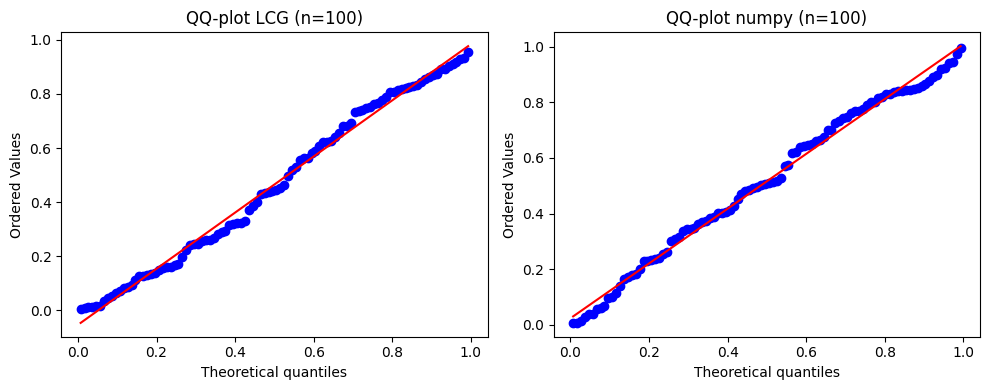

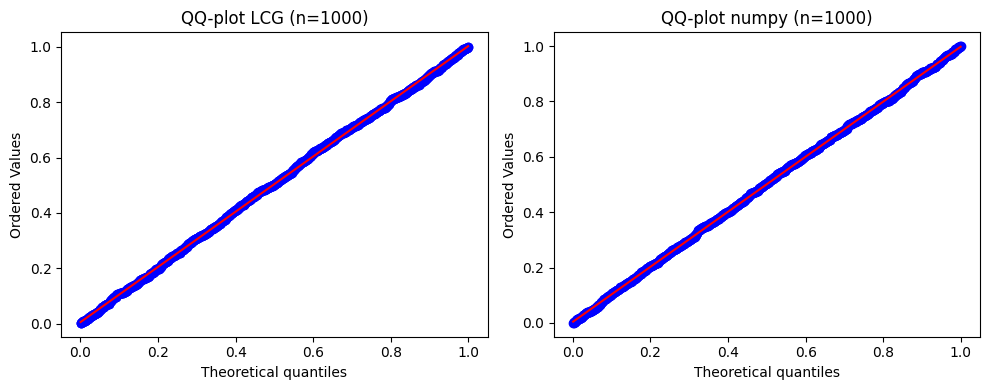

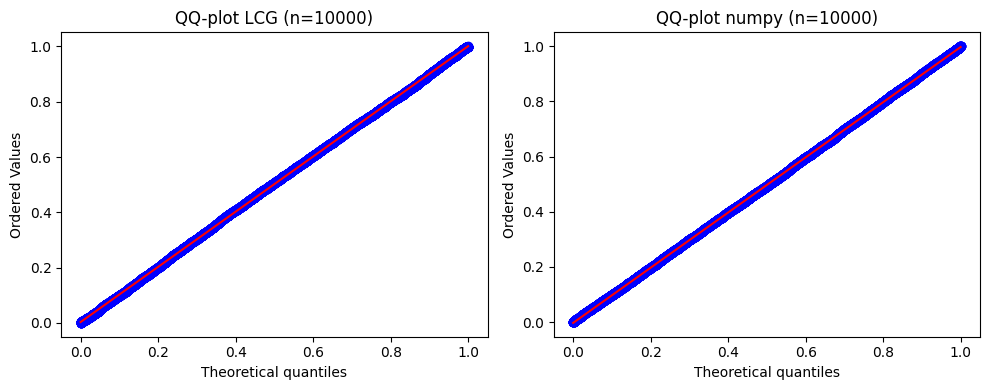

In [32]:
import matplotlib.pyplot as plt
from scipy import stats

# ejemplos para tres tamaños (ajusta si quieres otros)
for n in [10**2, 10**3, 10**4]:
    datos_lcg = lcg(n, 123456)
    datos_py = np.random.uniform(0,1,n)

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    stats.probplot(datos_lcg, dist='uniform', sparams=(0,1), plot=plt)
    plt.title(f'QQ-plot LCG (n={n})')

    plt.subplot(1,2,2)
    stats.probplot(datos_py, dist='uniform', sparams=(0,1), plot=plt)
    plt.title(f'QQ-plot numpy (n={n})')

    plt.tight_layout()
    plt.show()

Es decir, los QQ-plots muestran que los cuantiles empíricos siguen una relación aproximadamente lineal con los cuantiles teóricos de la distribución uniforme, lo que indica que los datos generados se ajustan adecuadamente a una U(0,1).

In [33]:
from scipy.stats import chisquare
observed, _ = np.histogram(datos_lcg, bins=10)
expected = [len(datos_lcg)/10]*10
stat, pval = chisquare(observed, expected)
print("χ² LCG:", stat, " p-value:", pval)
# repetir para datos_python

χ² LCG: 8.242  p-value: 0.5099545675695516


La prueba $x^2$ produce un p-value mayor a 0.05, por lo que no se rechaza la hipótesis nula de uniformidad. Además, los QQ-plots muestran alineación aproximadamente lineal con la recta teórica. Por lo tanto, los datos generados pueden considerarse provenientes de una distribución uniforme.

# ¿Cuál generador es mejor?

El generador de Python resulta más confiable que el LCG, especialmente para tamaños de muestra grandes.